<a href="https://colab.research.google.com/github/AlketaAlia123/Computer_Vision_Exercises/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 3: IMAGE CLASSIFICATION

Christian Mata, PhD

# **EXERCISE 3**

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load image

Loading image...


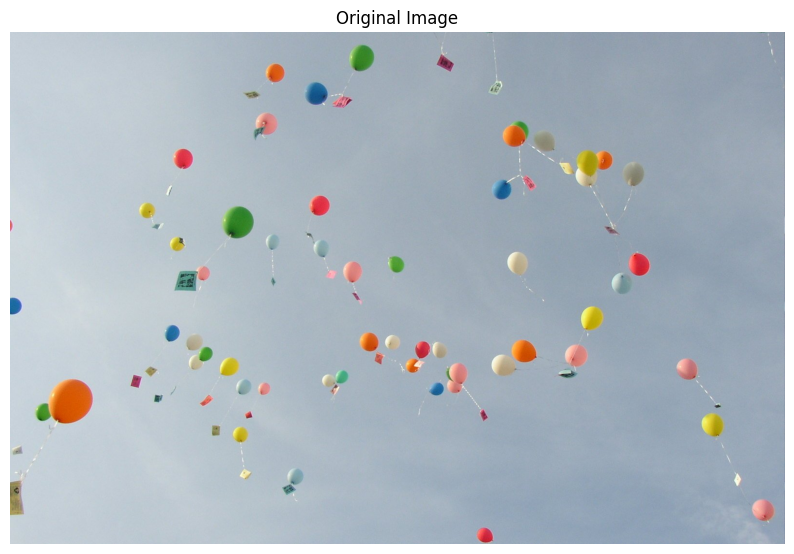

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches# 1. Load image
print("Loading image...")
# Your image is in the root directory of your Colab session
image = io.imread('/content/drive/MyDrive/baloons.jpg')
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

2.Convert from RGB to grayscale

Converting to grayscale...


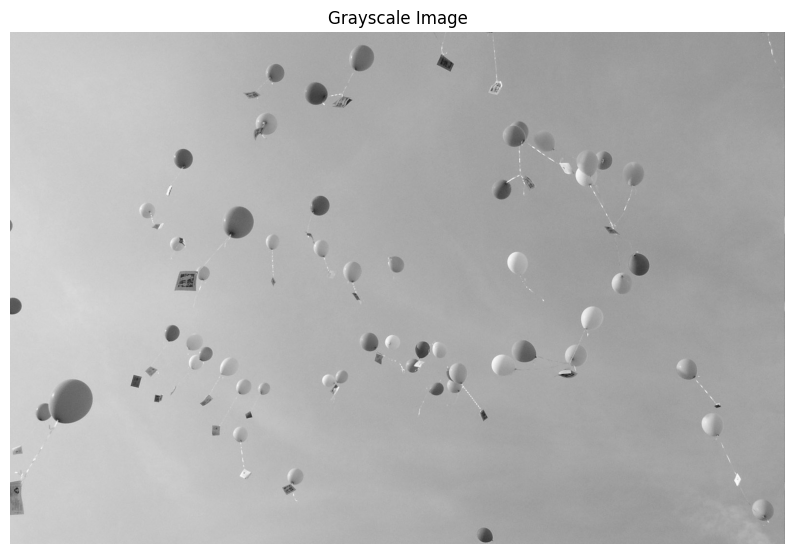

In [ ]:
# 2. Convert from RGB to grayscale
print("Converting to grayscale...")
gray_image = color.rgb2gray(image)
plt.figure(figsize=(10, 8))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

3. Gamma correction with $\gamma=0.5$

Applying gamma correction...


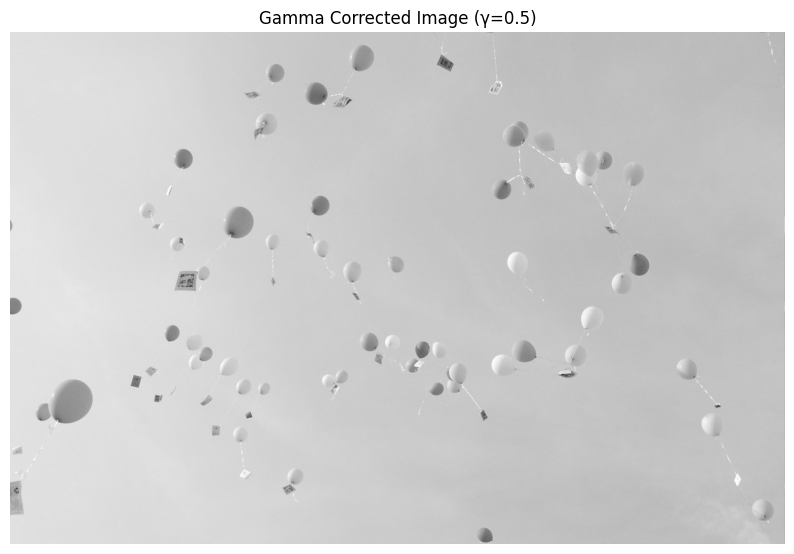

In [ ]:
print("Applying gamma correction...")
gamma_corrected = exposure.adjust_gamma(gray_image, 0.5)
plt.figure(figsize=(10, 8))
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected Image (γ=0.5)')
plt.axis('off')
plt.show()

4. Otsu threshold from grayscale (non gamma corrected)

Applying Otsu threshold to original grayscale...


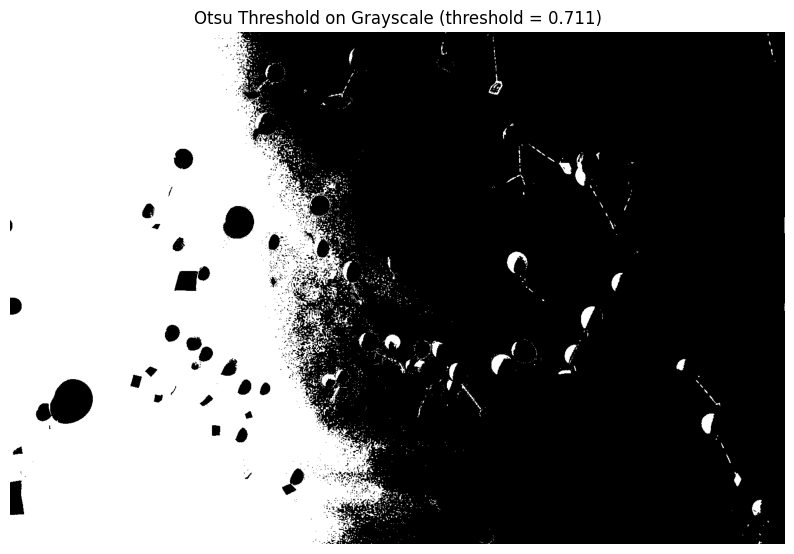

In [ ]:
print("Applying Otsu threshold to original grayscale...")
thresh_otsu = threshold_otsu(gray_image)
binary_otsu = gray_image > thresh_otsu
plt.figure(figsize=(10, 8))
plt.imshow(binary_otsu, cmap='gray')
plt.title(f'Otsu Threshold on Grayscale (threshold = {thresh_otsu:.3f})')
plt.axis('off')
plt.show()

5. Apply Otsu's threhold to gamma-corrected image

Applying Otsu threshold to gamma-corrected image...


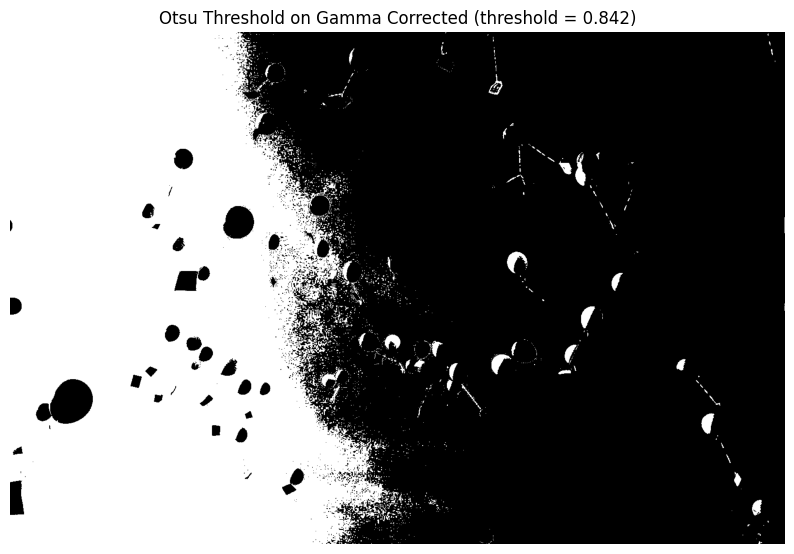

In [ ]:
print("Applying Otsu threshold to gamma-corrected image...")
thresh_gamma = threshold_otsu(gamma_corrected)
binary_gamma = gamma_corrected > thresh_gamma
plt.figure(figsize=(10, 8))
plt.imshow(binary_gamma, cmap='gray')
plt.title(f'Otsu Threshold on Gamma Corrected (threshold = {thresh_gamma:.3f})')
plt.axis('off')
plt.show()

6. label the objects

Labeling objects...
Number of regions is 1920.


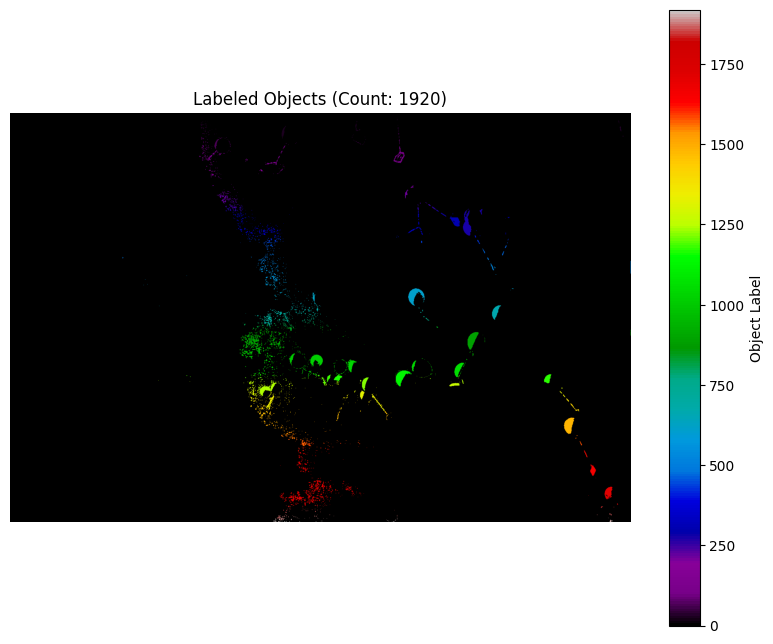

In [ ]:
# 6. Label the objects
print("Labeling objects...")
labeled_image, num_objects = label(binary_gamma, return_num=True)
print(f"Number of regions is {num_objects}.")

# Create colormap for labeled regions
plt.figure(figsize=(10, 8))
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title(f'Labeled Objects (Count: {num_objects})')
plt.colorbar(label='Object Label')
plt.axis('off')
plt.show()

7. Extract regional properties (Area and eccentricity)

In [ ]:
# 7. Extract regional properties (Area and eccentricity)
print("Extracting regional properties...")
props = regionprops(labeled_image)

# Print label, area, and eccentricity for each object (starting few)
print("label\tarea\teccentricity")
for i, prop in enumerate(props):
    if i < 5:  # Print only the first 5 for demonstration
        print(f"{i}\t{prop.area:.2f}\t{prop.eccentricity:.6f}")

# Extract area and eccentricity for all regions
areas = np.array([prop.area for prop in props])
eccentricities = np.array([prop.eccentricity for prop in props])

Extracting regional properties...
label	area	eccentricity
0	620111.00	0.812222
1	6.00	0.790569
2	6.00	0.974669
3	2.00	1.000000
4	8.00	0.918559


Show the sccaterplot the features

Creating scatterplot of features...


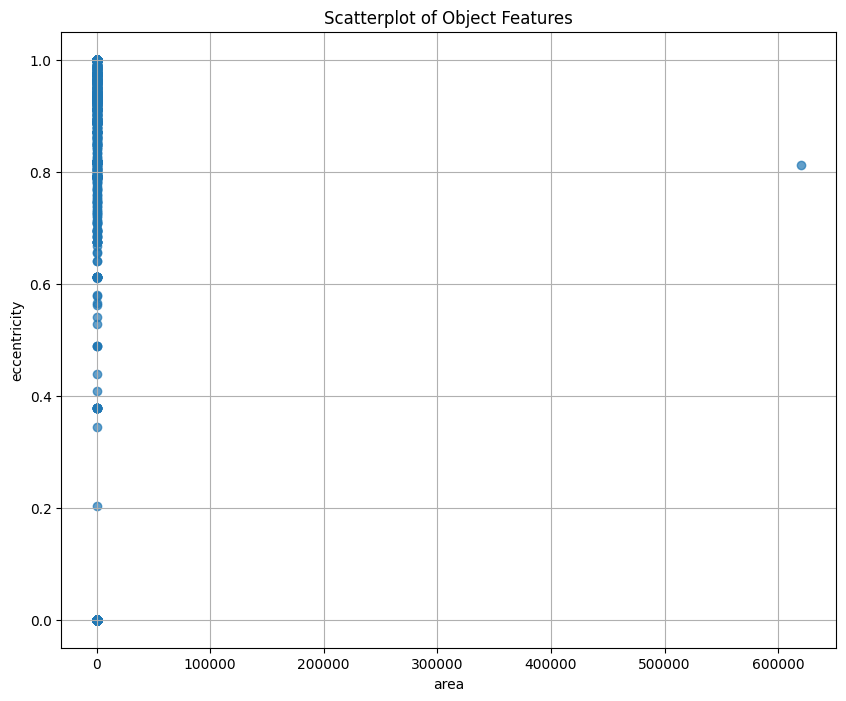

In [ ]:
# 8. Show the scatterplot of the features
print("Creating scatterplot of features...")
plt.figure(figsize=(10, 8))
plt.scatter(areas, eccentricities, alpha=0.7)
plt.ylabel('eccentricity')
plt.xlabel('area')
plt.title('Scatterplot of Object Features')
plt.grid(True)
plt.show()

8. Find balloons as objects with area higher than 500 and eccentricity lower than 0.8


In [ ]:
# 9. Find balloons as objects with area higher than 500 and eccentricity lower than 0.8
print("Finding balloons based on area and eccentricity criteria...")
balloon_indices = []
for i, prop in enumerate(props):
    if prop.area > 500 and prop.eccentricity < 0.8:
        balloon_indices.append(i + 1)  # +1 because labels start from 1, not 0

balloon_indices = np.array(balloon_indices)
print(balloon_indices)

Finding balloons based on area and eccentricity criteria...
[ 609  882 1013]


9. Plot the baloons

Plotting the balloons...


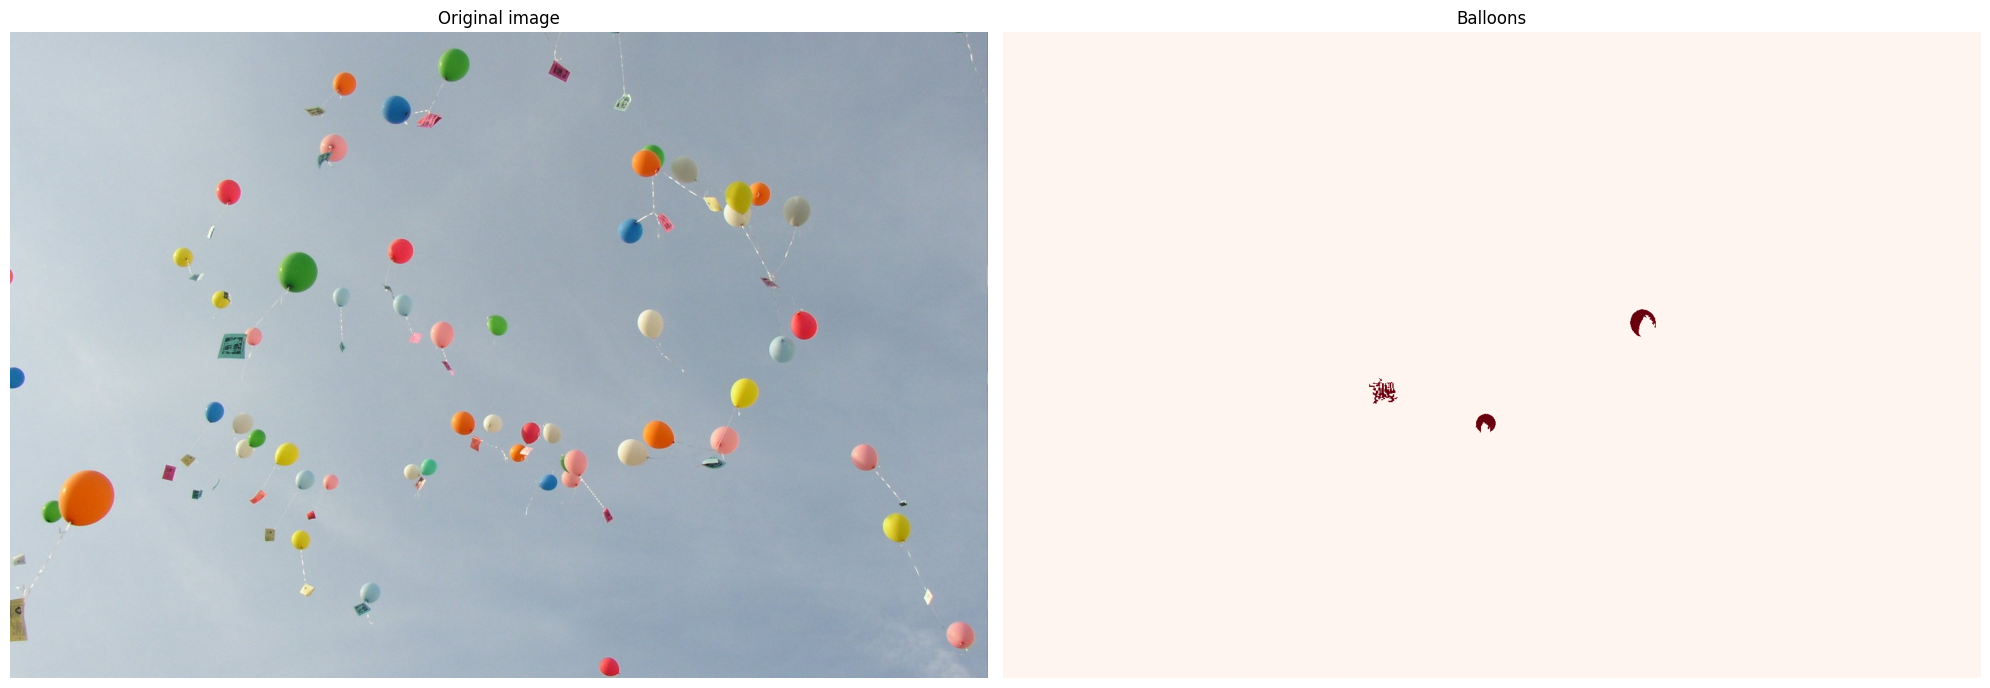

Balloon detection complete!


In [ ]:
# 10. Plot the balloons
print("Plotting the balloons...")
# Create a figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Original image with balloons highlighted
ax1.imshow(image)
ax1.set_title('Original image')
ax1.axis('off')

# Create a mask for the balloons
balloon_mask = np.zeros_like(labeled_image)
for idx in balloon_indices:
    balloon_mask[labeled_image == idx] = 1

# Show only the balloons
ax2.imshow(balloon_mask, cmap='Reds')
ax2.set_title('Balloons')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("Balloon detection complete!")